<a href="https://colab.research.google.com/github/jeffj9930/3D_MRI_medical_imaging/blob/master/Copy_of_ch1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)
#image = nib.load("/home/jeff/Documents/ml_files/medical_imaging/small/t1/IXI102-HH-1416-T1_fcm.nii.gz")


# New Section

In [ ]:
import os
import random
from random import randint
import numpy as np
import torch
import torchvision
import nibabel as nib
import matplotlib.pyplot as plt
from glob import glob
import sys
%matplotlib inline

root_dir = "/content/gdrive/My Drive/"
image_dir = os.path.join(root_dir,'ml_files/medical_imaging/small/')
t1_dir = os.path.join(image_dir, 't1')
t2_dir = os.path.join(image_dir, 't2')
t1_images = glob(os.path.join(t1_dir,'*.nii.gz'))
t2_images = glob(os.path.join(t2_dir,'*.nii.gz'))
assert len(t1_images) == len(t2_images) and len(t1_images) != 0

In [ ]:
seed = 22
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)

In [ ]:
rand_file = randint(0,len(t1_images))
image_t1 = nib.load(t1_images[rand_file]).get_fdata()
image_t2 = nib.load(t2_images[rand_file]).get_fdata()

In [ ]:
rand_idx = randint(0,len(image_t1[1,:,1]))
rand_idx = 49

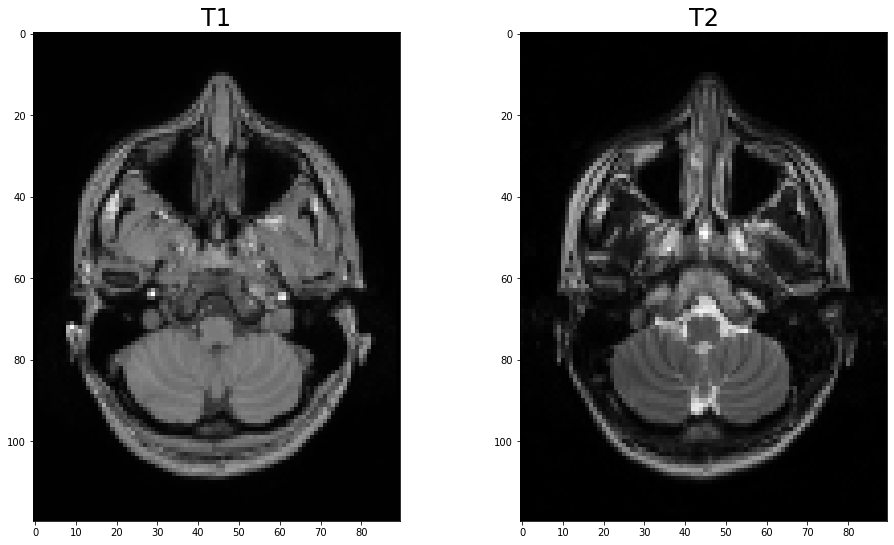

In [ ]:
fig, axes = plt.subplots(1,2,figsize=(16,9))
axes[0].imshow(image_t1[:,rand_idx,:],cmap='gray');axes[0].set_title('T1',fontsize=24)
axes[1].imshow(image_t2[:,rand_idx,:],cmap='gray');axes[1].set_title('T2',fontsize=24)
#plt.subplots(1,2,figsize=(16,9))
plt.show()